A continuación se muestra una matriz de expresión genética:

In [33]:
genexp<-read.csv("practica/GEMatrixFiltered.csv")
head(genexp)

X,X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,...,X214981_at,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at
Normal.BC0043N,9167.03,7380.27,8341.82,7944.99,8367.28,7884.22,6209.89,6009.60,9017.07,...,13.9187,30.9902,26.8305,30.6226,13.6677,23.7455,29.1401,23.8904,64.3171,25.5825
Cancer.BC0043T,10635.90,11010.80,9859.02,10493.60,10805.70,8507.10,9060.41,9426.21,8674.11,...,17.2673,56.3875,16.9442,14.5954,15.2555,19.2764,16.4308,26.5672,53.7115,28.7201
Normal.BC0051N,8015.29,6112.62,8287.92,7360.60,7060.93,8003.40,7140.51,6029.11,7026.17,...,26.6429,29.1446,23.8505,32.2064,15.9346,27.4183,21.6383,21.3962,27.9609,45.1721
Cancer.BC0051T,9081.20,8925.35,8276.54,9021.02,8622.68,8925.17,7862.39,6847.31,9651.01,...,37.5716,30.0083,20.7826,22.1020,27.5567,26.4899,26.3171,16.6457,41.5037,25.8667
Normal.BC0057N,9006.52,8338.44,7069.53,7909.77,7348.80,7966.06,7120.25,7903.76,7387.18,...,36.4167,29.9436,45.3716,31.1614,31.3397,32.0059,29.1746,21.2647,34.7236,35.4706
Cancer.BC0057T,8307.87,7295.69,7048.75,7111.87,6372.62,8056.31,6406.97,6256.54,7098.11,...,21.3444,54.1291,37.4840,22.2405,50.9866,26.8458,33.2448,18.3316,24.6310,24.8679


[1] 482

[1] 86

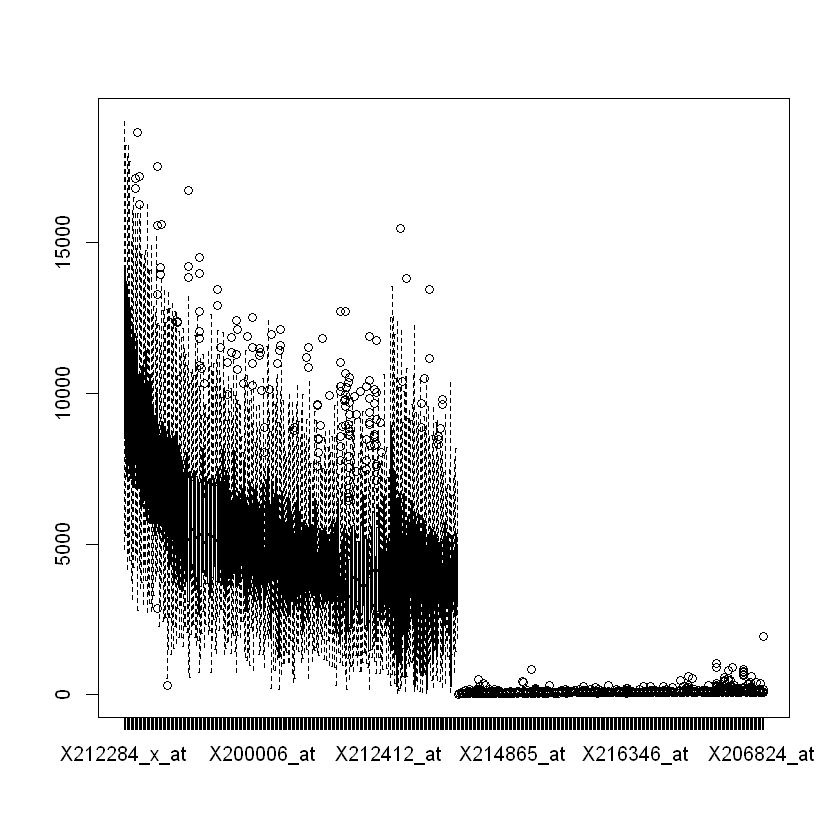

In [34]:
ncol(genexp)
nrow(genexp)
boxplot(genexp[,2:482])

### Limpieza de datos:

* Normalizar
* ¿Existen outliers? Tratamiento de Outliers

### Parte 1
Realizar un modelo de regresión logistica que sea capaz de, dada la expresión genética de 482 genes realice una predicción de si el tejido es canceroso o no:
* Pintar curva ROC
* Para un umbral de 0 calcular:
 * Precisión
 * F0.5
 * Exactitud
 * Exhaustividad
 * Matriz de confusión
 

In [38]:
genexpSinNormalizar<-genexp
#normalizamos, no incluyo la primera columna X donde dice si es Normal ó Cancer
for (i in 2:ncol(genexpSinNormalizar)){
    mn<- mean(genexp[,i],na.rm=T)
    sd<- sd(genexp[,i],na.rm=T)
    genexp[is.na(genexp[,i]),i]<-mn
    genexp[,i]<-(genexp[,i]-mn)/sd
}
#genexp queda normalizado, lo salvo en otra variable ya que lo utilizare mas tarde tambien
genexp1<-genexp
genexp1$diagnosis[grepl("Cancer", genexp1$X, ignore.case=TRUE)]<- "C"
genexp1$diagnosis[grepl("Normal", genexp1$X, ignore.case=TRUE)]<- "N"
genexp1$diagnosis<-as.factor(genexp1$diagnosis)
genexp1<-genexp1[,2:ncol(genexp1)]
head(genexp1)
idx1<-sample(1:nrow(genexp1),nrow(genexp1)*0.7)
genexp1.train<-genexp1[idx1,]
genexp1.test<-genexp1[-idx1,]

model_genexp1<-glm(data=genexp1.train,formula=diagnosis~.,family=binomial(link='logit'))   

y_predict1<-predict(model_genexp1, genexp1.test)
summary(y_predict1)
y_factor1<-as.factor(ifelse(y_predict1<0,"C","N"))
mc<-table(y_factor1,genexp1.test$diagnosis)
paste("Precision:", mc[1,1]/(mc[1,2]+mc[1,1]))
paste("Exhausitivad:", mc[1,1]/(mc[2,1]+mc[1,1]))
paste("Exactitud:",(mc[1,1]+mc[2,2])/sum(sum(mc)))
p<-mc[1,1]/(mc[1,2]+mc[1,1])
e<-mc[1,1]/(mc[2,1]+mc[1,1])
b<-0.5
(1+b^2)*(p*e)/(b^2*p+e)


X212284_x_at,X212869_x_at,X213614_x_at,X212391_x_at,X201257_x_at,AFFX.hum_alu_at,X206559_x_at,X214003_x_at,X208755_x_at,X200062_s_at,...,X216660_at,X217101_at,X218922_s_at,X203953_s_at,X221755_at,X208278_s_at,X207162_s_at,X206824_at,X218840_s_at,diagnosis
-0.6068573,-1.02303975,-0.5878681,-0.70458754,-0.4870628,-0.5981818,-1.0468240,-1.11345722,-0.1731209,-1.16301307,...,-0.3480473,-0.4267964,-0.3357943,-0.5709978,-0.6923526,-0.4120570,-0.4092972,1.5176937,-0.16249306,N
-0.1727236,0.04000518,-0.1604944,0.08466742,0.2924008,-0.3718649,-0.1419996,-0.04807841,-0.2977776,-0.00754408,...,0.9775076,-0.9261639,-1.4005432,-0.5360644,-0.9679607,-1.1016441,-0.3465632,0.9096190,-0.14729511,C
-0.9472612,-1.39421666,-0.6030510,-0.88556176,-0.9046498,-0.5548790,-0.7514226,-1.10737355,-0.8967592,-1.08050403,...,-0.4443742,-0.5773193,-0.2305764,-0.5211235,-0.4658521,-0.8190931,-0.4677517,-0.5667981,-0.06760471,N
-0.6322249,-0.57062937,-0.6062566,-0.37136197,-0.4054218,-0.2199636,-0.5222803,-0.85223967,0.0572991,-0.80758487,...,-0.3992954,-0.7322822,-0.9018507,-0.2654248,-0.5231062,-0.5652286,-0.5790853,0.2096817,-0.16111645,C
-0.6542970,-0.74248078,-0.9462542,-0.71549449,-0.8126294,-0.5684461,-0.7578536,-0.52281389,-0.7655418,-0.79423415,...,-0.4026722,0.5097343,-0.2999997,-0.1821947,-0.1829361,-0.4101850,-0.4708336,-0.1790570,-0.11459696,N
-0.8607874,-1.04780538,-0.9521076,-0.96258861,-1.1246744,-0.5356547,-0.9842660,-1.03645556,-0.8706110,-1.24779836,...,0.8596355,0.1113232,-0.8926497,0.2500582,-0.5011580,-0.1893422,-0.5395743,-0.7577187,-0.16595445,C


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-259.37  -74.26   17.39   43.27  136.25  578.57 

[1] "Precision: 0.666666666666667"

[1] "Exhausitivad: 0.666666666666667"

[1] "Exactitud: 0.692307692307692"

[1] 0.6666667

### Parte 2

Realizar clusterización por k-means y uno basado en áboles (dendrograma). ¿Cual sería el número de clusters óptimo?  ¿Puedes identificar algún cluster interesante?

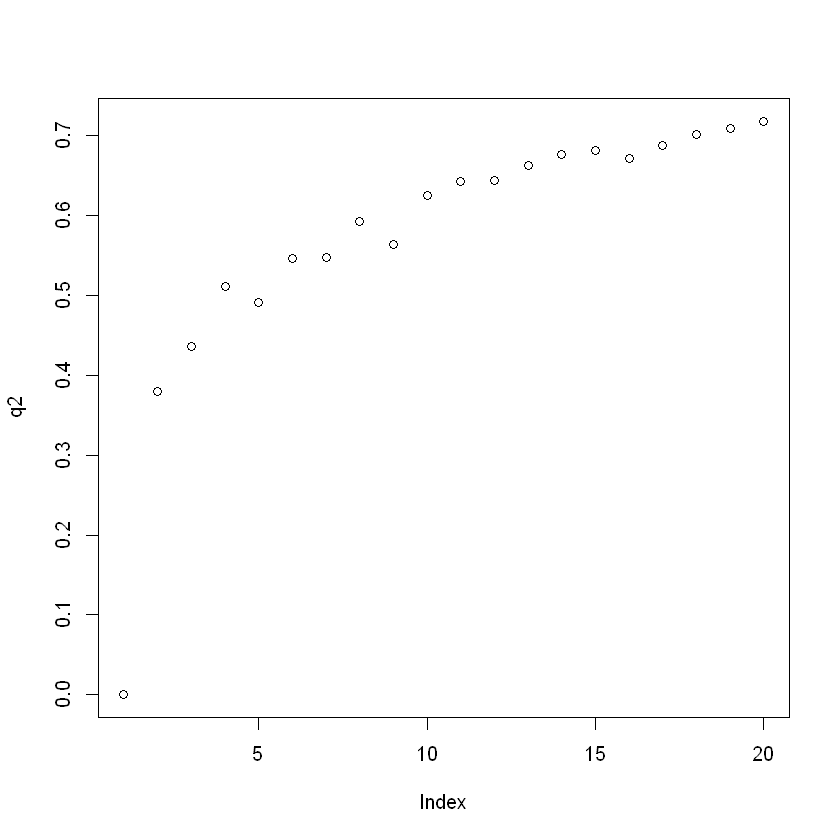

In [10]:
#genexp ya esta normalizado de arriba
genexp2<-genexp[,2:ncol(genexp)]

myclust2<-kmeans(genexp2,5)

q2<-c()
for (k in 1:20){
    myclust2<-kmeans(genexp2,k)
    q2[k]<-myclust2$betweenss/myclust2$totss
}
plot(q2)
#table(genexp$class, myclust2$cluster)

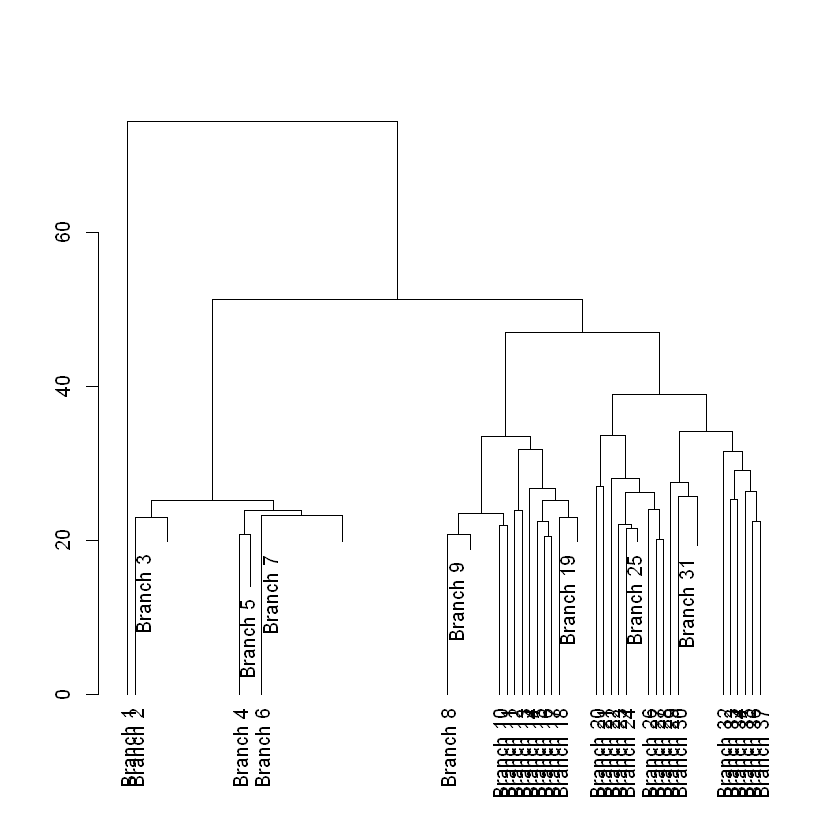

In [11]:
d <- dist(as.matrix(genexp2),method = "euclidean")
hc <- hclust(d,method="complete")
hcd <- as.dendrogram(hc)
plot(cut(hcd,h=20)$upper)

### Parte 3

Realizar un PCA, quedarse con los dos valores más representativos. Pintarlo en una nube de puntos donde los tejidos normales tendrán un color y los tejidos con cancer otro.

A partir de esta representación simplificada (con solo 2 valores más significativos) crear un modelo de regresión logística. Compara la curva ROC de este nuevo modelo con el de la *Parte 1*

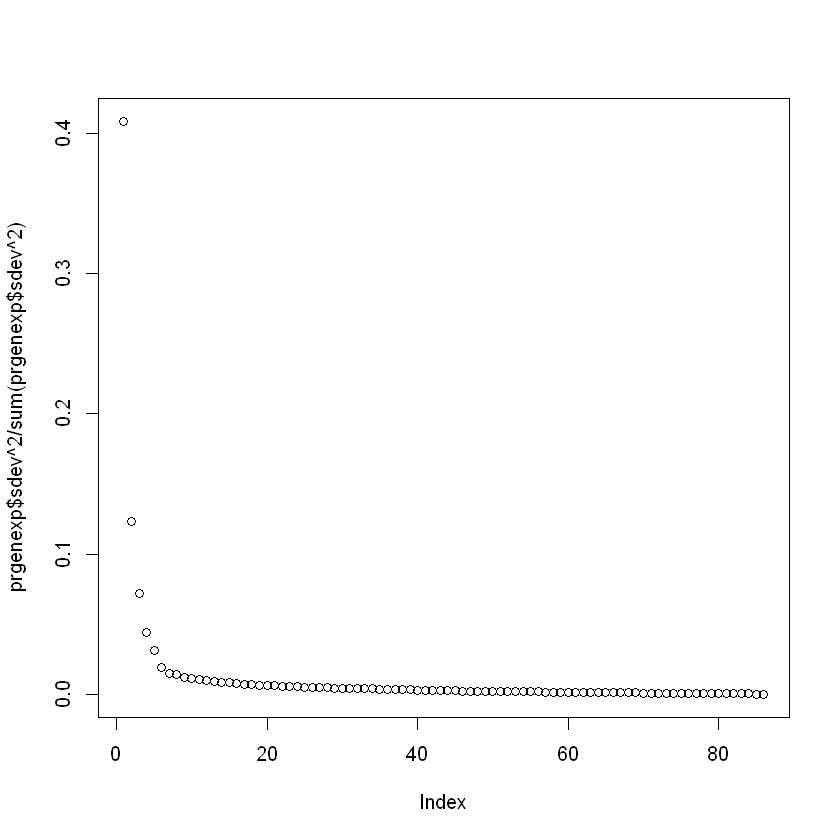

In [13]:
#Utilizamos prcomp para calcular el pca
genexp3<-genexpSinNormalizar[,2:ncol(genexpSinNormalizar)]
prgenexp<-prcomp(genexp3, center=TRUE, scale. = TRUE)
plot(prgenexp$sdev^2/sum(prgenexp$sdev^2))


In [30]:
pca_data<-as.data.frame(prgenexp$x[,1:2])
genexp$diagnosis[grep("Cancer", genexp$X, ignore.case=TRUE)]<- "C"
genexp$diagnosis[grep("Normal", genexp$X, ignore.case=TRUE)]<- "N"
pca_data$diagnosis<-as.factor(genexp$diagnosis)
head(pca_data)
idx<-sample(1:nrow(pca_data),nrow(pca_data)*0.7)
genexp4.train_norm<-pca_data[idx,]
genexp4.test_norm<-pca_data[-idx,]

model_genexp4<-glm(data=genexp4.train_norm,formula = diagnosis ~ ., family=binomial(link='logit'))

y_predict4 <- predict(model_genexp4, genexp4.test_norm)
y_factor4<-as.factor(ifelse(y_predict4<0,"N","C"))

table(y_factor4,genexp4.test_norm$diagnosis)

PC1,PC2,diagnosis
-15.943631,2.9012870,N
-8.738585,-9.6768034,C
-14.384371,3.4423130,N
-11.600260,-2.4953920,C
-11.359176,4.2280798,N
-13.697708,-0.6846294,C


         
y_factor4 C N
        C 8 7
        N 6 5

In [23]:
str(pca_data)

'data.frame':	86 obs. of  3 variables:
 $ PC1      : num  -15.94 -8.74 -14.38 -11.6 -11.36 ...
 $ PC2      : num  2.9 -9.68 3.44 -2.5 4.23 ...
 $ diagnosis: Factor w/ 2 levels "C","N": 2 1 2 1 2 1 2 1 2 1 ...


   
     1  2
  C 19 24
  N 23 20

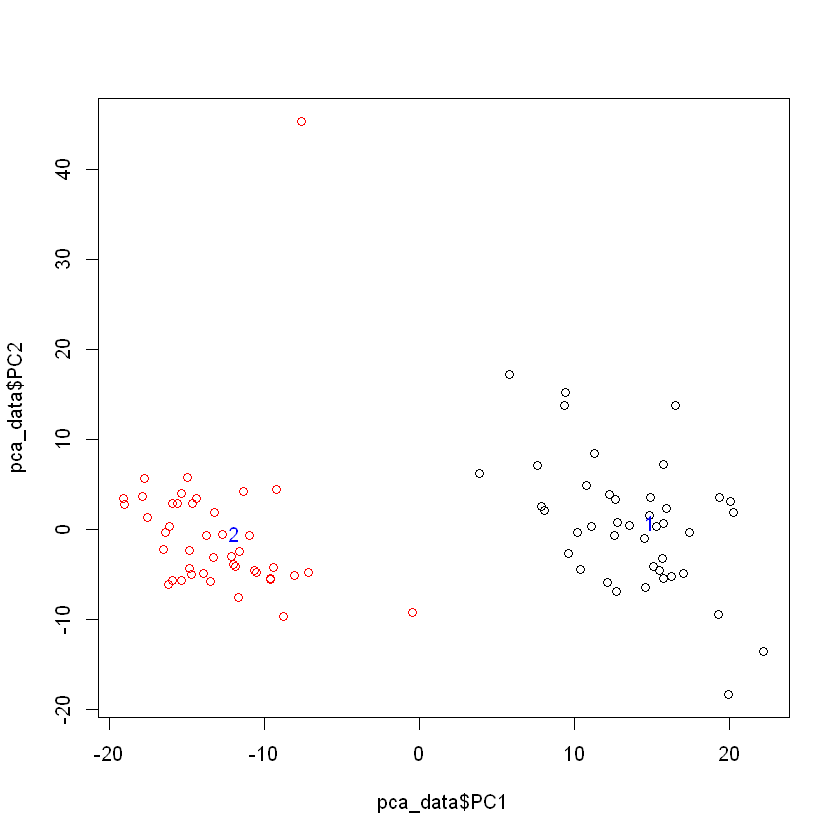

In [24]:
myclustpca<-kmeans(pca_data[,1:2],2)

plot(pca_data$PC1,pca_data$PC2,col=myclustpca$cluster)
text(x=myclustpca$centers[,1], y=myclustpca$centers[,2], cex=1, pos=4, labels=(1:nrow(myclustpca$centers)),col="blue")
table(pca_data$diagnosis,myclustpca$cluster)